### Prediction of the dG values - First Version

Free energy of unfolding (dG = ΔG): Change in Gibbs free energy going from the folded to the unfolded state; this parameter belongs to the thermodynamic stability.

1. Predicting the dG values for the Wild type and every mutated Sequence in the Dataset with PyRosetta.

In [4]:
import pyrosetta; pyrosetta.init()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import ranksums

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release 2023.27+release.e3ce6ea9faf661ae8fa769511e2a9b8596417e58 2023-07-07T12:00:46] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python310.Release r353 2023.27+release.e3ce6ea e3ce6ea9faf661ae8fa769511e2a9b8596417e58 http://www.pyrosetta.org 2023-07-07T12:00:46
core.init: command: PyRosetta -ex1 -ex2aro -database /home/rebeccalinux/miniconda3/lib/python3.10/site-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=1439470852 seed_offset=0 real_seed=1439470852 thread_index=0
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=1439470852 RG_type=mt19937


In [11]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:
import urllib.request

url = 'https://rest.uniprot.org/uniprotkb/P42212.fasta'
filename = 'P42212.fasta'

urllib.request.urlretrieve(url, filename)

with open(filename, 'r') as file:
    avGFP_UNIPROT_all = file.read()
avGFP_WT = avGFP_UNIPROT_all.split('\n', 1)[1].replace('\n', '')

pose = pyrosetta.pose_from_sequence(avGFP_WT)

scorefxn = pyrosetta.get_score_function()

avGFP_WT_stability_score = scorefxn(pose)


core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 3.32812 seconds.
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params

In [ ]:
print(avGFP_WT_stability_score)

In [8]:
df = pd.read_csv('/mnt/c/Users/uni.rebecca.ress/Documents/rebecca.ress/Universität Heidelberg/4. Fachsemester/4. Fachsemester/Bioinformatik Projekt Niopek/Daten/GFP_AEQVI_Sarkisyan_2016.csv')

In [16]:
from tqdm import tqdm
chunk_size = 10  # Size of the chunks
scorefxn = pyrosetta.get_score_function()

results = []

num_chunks = (len(df) - 1) // chunk_size + 1
for i in tqdm(range(num_chunks), desc='Processing chunks', unit='chunk'):
    start = i * chunk_size
    end = (i + 1) * chunk_size
    chunk = df.iloc[start:end].copy()  # copie
    for index, row in chunk.iterrows():
        sequence = row['mutated_sequence']
        pose = pyrosetta.pose_from_sequence(sequence)
        stability_score = scorefxn(pose)
        chunk.at[index, 'Score'] = stability_score
    results.append(chunk)

df_dG_values_all = pd.concat(results)

Processing chunks: 100%|██████████| 5172/5172 [1:42:41<00:00,  1.19s/chunk]


core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


Processing chunks:   2%|▏         | 125/5172 [02:54<1:57:18,  1.39s/chunk]


KeyboardInterrupt: 

In [15]:
print(df_dG_values_all)

                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

In [19]:
# File path to save the CSV file
file_path = '/mnt/c/Users/uni.rebecca.ress/Documents/rebecca.ress/Universität Heidelberg/4. Fachsemester/4. Fachsemester/Bioinformatik Projekt Niopek/Daten/df_dG_values_all.csv'

# Save the DataFrame as a CSV file
df_dG_values_all.to_csv(file_path, index=False)

In [4]:
# File path to the CSV file
file_path = '/mnt/c/Users/uni.rebecca.ress/Documents/rebecca.ress/Universität Heidelberg/4. Fachsemester/4. Fachsemester/Bioinformatik Projekt Niopek/Daten/df_dG_values_all.csv'

# Load the CSV file into a DataFrame
df_dG_values_all = pd.read_csv(file_path)

# Display the loaded DataFrame
print(df_dG_values_all)


                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

In [5]:
# calculate the ddG
df_dG_values_all['ΔΔG'] =  df_dG_values_all['Score']  - 72225.96138085332
df_ddG_values = df_dG_values_all
print(df_ddG_values)

                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

In [6]:
#Min/Max value

min_value = df_ddG_values['Score'].min()
max_value = df_ddG_values['Score'].max()

print("Min.:", min_value)
print("Max.:", max_value)

Min.: 69145.34479479823
Max.: 78104.07466659426


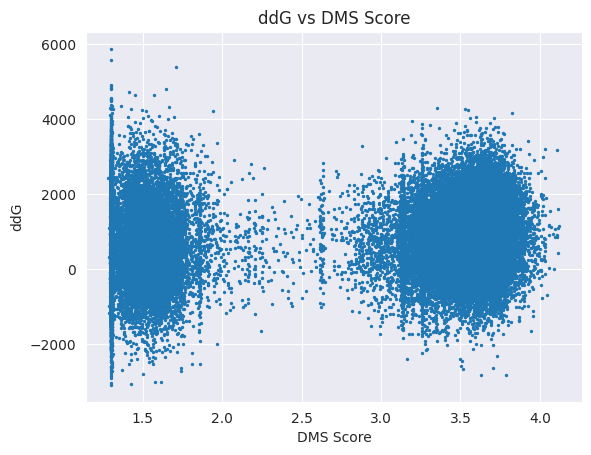

In [11]:
plt.scatter(df_ddG_values['DMS_score'], df_ddG_values['ΔΔG'], s=2)
plt.xlabel('DMS Score')
plt.ylabel('ddG')
plt.title('ddG vs DMS Score')

# Display the plot
plt.show()